In [1]:
import pandas as pd
import numpy as np

In [2]:
curry = pd.read_csv('Data/curry2010-18.csv')
curry = curry.sort_values(by=['game_date', 'period','minutes_remaining','seconds_remaining'], ascending=False)
curry = curry.sort_values(by=['game_date','period']).reset_index().drop(columns='index')
curry.head()

,name,team_name,game_date,season,espn_player_id,team_id,espn_game_id,period,minutes_remaining,seconds_remaining,...,shot_type,shot_distance,opponent,x,y,dribbles,touch_time,defender_name,defender_distance,shot_clock
0,Stephen Curry,Golden State Warriors,2010-10-27,2010,3975,1610612744,301027009.0,1,9,39,...,2PT Field Goal,16,Houston Rockets,13,167,NaN,NaN,NaN,NaN,NaN
1,Stephen Curry,Golden State Warriors,2010-10-27,2010,3975,1610612744,301027009.0,1,8,43,...,2PT Field Goal,15,Houston Rockets,159,14,NaN,NaN,NaN,NaN,NaN
2,Stephen Curry,Golden State Warriors,2010-10-27,2010,3975,1610612744,301027009.0,1,6,20,...,2PT Field Goal,16,Houston Rockets,-86,135,NaN,NaN,NaN,NaN,NaN
3,Stephen Curry,Golden State Warriors,2010-10-27,2010,3975,1610612744,301027009.0,1,4,52,...,2PT Field Goal,18,Houston Rockets,97,153,NaN,NaN,NaN,NaN,NaN
4,Stephen Curry,Golden State Warriors,2010-10-27,2010,3975,1610612744,301027009.0,1,1,39,...,3PT Field Goal,26,Houston Rockets,-152,214,NaN,NaN,NaN,NaN,NaN


In [3]:
curry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10230 entries, 0 to 10229
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               10230 non-null  object 
 1   team_name          10230 non-null  object 
 2   game_date          10230 non-null  object 
 3   season             10230 non-null  int64  
 4   espn_player_id     10230 non-null  int64  
 5   team_id            10230 non-null  int64  
 6   espn_game_id       10213 non-null  float64
 7   period             10230 non-null  int64  
 8   minutes_remaining  10230 non-null  int64  
 9   seconds_remaining  10230 non-null  int64  
 10  shot_made_flag     10230 non-null  int64  
 11  action_type        10230 non-null  object 
 12  shot_type          10230 non-null  object 
 13  shot_distance      10230 non-null  int64  
 14  opponent           10230 non-null  object 
 15  x                  10230 non-null  int64  
 16  y                  102

In [4]:
dates = curry[~curry['defender_name'].isna()].reset_index().drop(columns='index')

In [5]:
dates.isna().sum()

name                 0
team_name            0
game_date            0
season               0
espn_player_id       0
team_id              0
espn_game_id         0
period               0
minutes_remaining    0
seconds_remaining    0
shot_made_flag       0
action_type          0
shot_type            0
shot_distance        0
opponent             0
x                    0
y                    0
dribbles             0
touch_time           0
defender_name        0
defender_distance    0
shot_clock           0
dtype: int64

In [6]:
dates = dates['game_date'].unique().tolist()
len(dates)

224

---

In [7]:
from nba_api.stats.endpoints import shotchartdetail

df_1 = shotchartdetail.ShotChartDetail(
    team_id=1610612744,
    player_id=201939,
    season_nullable='2013-14',
    season_type_all_star = 'Regular Season',
    context_measure_simple = 'FGA').get_data_frames()[0]

df_2 = shotchartdetail.ShotChartDetail(
    team_id=1610612744,
    player_id=201939,
    season_nullable='2014-15',
    season_type_all_star = 'Regular Season',
    context_measure_simple = 'FGA').get_data_frames()[0]

df_3 = shotchartdetail.ShotChartDetail(
    team_id=1610612744,
    player_id=201939,
    season_nullable='2015-16',
    season_type_all_star = 'Regular Season',
    context_measure_simple = 'FGA').get_data_frames()[0]

df = pd.concat([df_1, df_2, df_3])

#
df['GAME_DATE'] = pd.to_datetime(df['GAME_DATE'])
df['GAME_DATE'] = df['GAME_DATE'].astype(str)

#
df_list = []

for date in dates:
    
    df_list.append(df[df['GAME_DATE']==date])
    
df = pd.concat(df_list).reset_index().drop(columns='index')

# Remove 3164th entry: 3rd quarter, 8:18 remaining, missed above the break 3, game event_id = 562

df = df.drop(3164)
df = df.reset_index().drop(columns='index')

df = df[['PERIOD','MINUTES_REMAINING','SECONDS_REMAINING','SHOT_ZONE_BASIC','SHOT_ZONE_AREA','SHOT_ZONE_RANGE','GAME_DATE','HTM']]
df

,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,GAME_DATE,HTM
0,1,9,47,In The Paint (Non-RA),Center(C),Less Than 8 ft.,2013-10-30,GSW
1,1,5,34,In The Paint (Non-RA),Center(C),8-16 ft.,2013-10-30,GSW
2,1,2,11,Above the Break 3,Left Side Center(LC),24+ ft.,2013-10-30,GSW
3,2,6,37,Above the Break 3,Left Side Center(LC),24+ ft.,2013-10-30,GSW
4,2,3,8,Mid-Range,Left Side Center(LC),16-24 ft.,2013-10-30,GSW
...,...,...,...,...,...,...,...,...
3450,3,3,57,Above the Break 3,Center(C),24+ ft.,2016-01-20,CHI
3451,3,2,56,Above the Break 3,Right Side Center(RC),24+ ft.,2016-01-20,CHI
3452,3,0,9,Restricted Area,Center(C),Less Than 8 ft.,2016-01-20,CHI
3453,4,5,54,Above the Break 3,Center(C),24+ ft.,2016-01-20,CHI


In [8]:
dates = df['GAME_DATE'].unique().tolist()
len(dates)

196

In [9]:
df_list = []

for date in dates:
    
    df_list.append(curry[curry['game_date']==date])
    
df_ = pd.concat(df_list).reset_index().drop(columns='index')

In [10]:
df_

,name,team_name,game_date,season,espn_player_id,team_id,espn_game_id,period,minutes_remaining,seconds_remaining,...,shot_type,shot_distance,opponent,x,y,dribbles,touch_time,defender_name,defender_distance,shot_clock
0,Stephen Curry,Golden State Warriors,2013-10-30,2013,3975,1610612744,400488890.0,1,9,47,...,2PT Field Goal,5,Los Angeles Lakers,-52,26,10.0,7.5,"Gasol, Pau",5.3,16.3
1,Stephen Curry,Golden State Warriors,2013-10-30,2013,3975,1610612744,400488890.0,1,5,34,...,2PT Field Goal,13,Los Angeles Lakers,-65,121,3.0,2.8,"Blake, Steve",3.4,19.3
2,Stephen Curry,Golden State Warriors,2013-10-30,2013,3975,1610612744,400488890.0,1,2,11,...,3PT Field Goal,26,Los Angeles Lakers,-144,228,6.0,5.3,"Farmar, Jordan",3.0,16.8
3,Stephen Curry,Golden State Warriors,2013-10-30,2013,3975,1610612744,400488890.0,2,6,37,...,3PT Field Goal,25,Los Angeles Lakers,-86,244,6.0,5.5,"Farmar, Jordan",5.4,16.7
4,Stephen Curry,Golden State Warriors,2013-10-30,2013,3975,1610612744,400488890.0,2,3,8,...,2PT Field Goal,20,Los Angeles Lakers,-130,153,9.0,8.8,"Blake, Steve",3.3,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,Stephen Curry,Golden State Warriors,2016-01-20,2015,3975,1610612744,400828521.0,3,3,57,...,3PT Field Goal,24,Chicago Bulls,17,249,14.0,9.0,"Brooks, Aaron",5.4,13.0
3451,Stephen Curry,Golden State Warriors,2016-01-20,2015,3975,1610612744,400828521.0,3,2,56,...,3PT Field Goal,24,Chicago Bulls,137,203,0.0,0.6,"McDermott, Doug",3.4,8.3
3452,Stephen Curry,Golden State Warriors,2016-01-20,2015,3975,1610612744,400828521.0,3,0,9,...,2PT Field Goal,0,Chicago Bulls,0,1,21.0,19.4,"Butler, Jimmy",6.5,5.1
3453,Stephen Curry,Golden State Warriors,2016-01-20,2015,3975,1610612744,400828521.0,4,5,54,...,3PT Field Goal,25,Chicago Bulls,40,252,2.0,2.2,"Butler, Jimmy",4.8,13.2


In [11]:
df = pd.concat([df_, df], axis=1)
df

,name,team_name,game_date,season,espn_player_id,team_id,espn_game_id,period,minutes_remaining,seconds_remaining,...,defender_distance,shot_clock,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,GAME_DATE,HTM
0,Stephen Curry,Golden State Warriors,2013-10-30,2013,3975,1610612744,400488890.0,1,9,47,...,5.3,16.3,1,9,47,In The Paint (Non-RA),Center(C),Less Than 8 ft.,2013-10-30,GSW
1,Stephen Curry,Golden State Warriors,2013-10-30,2013,3975,1610612744,400488890.0,1,5,34,...,3.4,19.3,1,5,34,In The Paint (Non-RA),Center(C),8-16 ft.,2013-10-30,GSW
2,Stephen Curry,Golden State Warriors,2013-10-30,2013,3975,1610612744,400488890.0,1,2,11,...,3.0,16.8,1,2,11,Above the Break 3,Left Side Center(LC),24+ ft.,2013-10-30,GSW
3,Stephen Curry,Golden State Warriors,2013-10-30,2013,3975,1610612744,400488890.0,2,6,37,...,5.4,16.7,2,6,37,Above the Break 3,Left Side Center(LC),24+ ft.,2013-10-30,GSW
4,Stephen Curry,Golden State Warriors,2013-10-30,2013,3975,1610612744,400488890.0,2,3,8,...,3.3,14.4,2,3,8,Mid-Range,Left Side Center(LC),16-24 ft.,2013-10-30,GSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,Stephen Curry,Golden State Warriors,2016-01-20,2015,3975,1610612744,400828521.0,3,3,57,...,5.4,13.0,3,3,57,Above the Break 3,Center(C),24+ ft.,2016-01-20,CHI
3451,Stephen Curry,Golden State Warriors,2016-01-20,2015,3975,1610612744,400828521.0,3,2,56,...,3.4,8.3,3,2,56,Above the Break 3,Right Side Center(RC),24+ ft.,2016-01-20,CHI
3452,Stephen Curry,Golden State Warriors,2016-01-20,2015,3975,1610612744,400828521.0,3,0,9,...,6.5,5.1,3,0,9,Restricted Area,Center(C),Less Than 8 ft.,2016-01-20,CHI
3453,Stephen Curry,Golden State Warriors,2016-01-20,2015,3975,1610612744,400828521.0,4,5,54,...,4.8,13.2,4,5,54,Above the Break 3,Center(C),24+ ft.,2016-01-20,CHI


In [12]:
df = df.drop(columns=['PERIOD','MINUTES_REMAINING','SECONDS_REMAINING','GAME_DATE'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3455 entries, 0 to 3454
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               3455 non-null   object 
 1   team_name          3455 non-null   object 
 2   game_date          3455 non-null   object 
 3   season             3455 non-null   int64  
 4   espn_player_id     3455 non-null   int64  
 5   team_id            3455 non-null   int64  
 6   espn_game_id       3455 non-null   float64
 7   period             3455 non-null   int64  
 8   minutes_remaining  3455 non-null   int64  
 9   seconds_remaining  3455 non-null   int64  
 10  shot_made_flag     3455 non-null   int64  
 11  action_type        3455 non-null   object 
 12  shot_type          3455 non-null   object 
 13  shot_distance      3455 non-null   int64  
 14  opponent           3455 non-null   object 
 15  x                  3455 non-null   int64  
 16  y                  3455 

---

In [14]:
game = curry[curry['espn_game_id']==400827890.0]

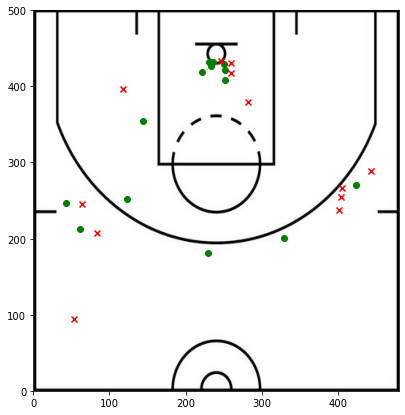

In [15]:
import matplotlib.pyplot as plt

# Plot makes and misses
img = plt.imread("court.png")

fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(img, extent=[1, 480, -1, 500])
ax.scatter(240+game[game['shot_made_flag']==1]['x'], 440-game[game['shot_made_flag']==1]['y'], marker='o', c='g')
ax.scatter(240+game[game['shot_made_flag']==0]['x'], 440-game[game['shot_made_flag']==0]['y'], marker='x', c='r')
plt.xlim(0,480)
plt.ylim(0,500)
plt.show()

---

In [16]:
games = df['espn_game_id'].unique().tolist()

In [17]:
df_list = []

for game in games:
    shot_df = df[df['espn_game_id']==game].reset_index().drop(columns='index')
    
    # Create new column 'follows_make' that identifies shots following a made shot
    shot_df['follows_make'] = shot_df['shot_made_flag'].shift()
    shot_df['follows_make'] = shot_df['follows_make'].replace(np.nan,0).astype(int)
    
    
    # AFTER TWO MAKES OR TWO MISSES

    # Create new column 'follows_streak' that identifies shots following streaks of two makes or two misses
    shot_df['follows_streak'] = shot_df.shot_made_flag.ne(shot_df['shot_made_flag'].shift())
    shot_df['follows_streak'] = shot_df['follows_streak'].shift()
    shot_df['follows_streak'] = shot_df['follows_streak'].replace(np.nan,True)
    shot_df['follows_streak'] = ~shot_df['follows_streak']

    # Intermediate columns to identify streaks of makes or misses
    shot_df['new1'] = shot_df.follows_streak.eq(shot_df.shot_made_flag.shift())
    shot_df.loc[shot_df['follows_streak'], 'new2'] = shot_df['new1']

    # Create new columns 'follows_two_makes'
    shot_df['follows_two_makes'] = shot_df.follows_streak == shot_df.new2
    shot_df['follows_two_makes'] = shot_df['follows_two_makes'].astype(int)

    # Create new columns 'follows_two_misses'
    shot_df['follows_two_misses'] = shot_df.follows_streak ^ shot_df.new2
    shot_df['follows_two_misses'] = shot_df['follows_two_misses'].astype(int)

    # Drop intermediate columns
    shot_df = shot_df.drop(columns=['follows_streak', 'new1', 'new2'])
    
    # AFTER THREE MAKES OR THREE MISSES

    # Create new column 'follows_streak' that identifies shots following streaks of three makes or three misses
    shot_df['follows_streak'] = (shot_df.shot_made_flag == shot_df.shot_made_flag.shift()) & (shot_df.shot_made_flag.shift() == shot_df.shot_made_flag.shift().shift())
    shot_df['follows_streak'] = shot_df['follows_streak'].shift()
    shot_df['follows_streak'] = shot_df['follows_streak'].replace(np.nan,False)

    # Intermediate columns to identify streaks of makes or misses
    shot_df['new1'] = shot_df.follows_streak.eq(shot_df.shot_made_flag.shift())
    shot_df.loc[shot_df['follows_streak'], 'new2'] = shot_df['new1']

    # Create new columns 'follows_three_makes' and 'success_following_three_makes'
    shot_df['follows_three_makes'] = shot_df.follows_streak == shot_df.new2
    shot_df['follows_three_makes'] = shot_df['follows_three_makes'].astype(int)

    # Create new columns 'follows_three_misses' and 'success_following_three_misses'
    shot_df['follows_three_misses'] = shot_df.follows_streak ^ shot_df.new2
    shot_df['follows_three_misses'] = shot_df['follows_three_misses'].astype(int)

    # Drop intermediate columns
    shot_df = shot_df.drop(columns=['follows_streak', 'new1', 'new2'])
    
    
    # AFTER FOUR MAKES OR FOUR MISSES
    
    # Create new column 'follows_streak' that identifies shots following streaks of four makes or four misses
    shot_df['follows_streak'] = (shot_df.shot_made_flag == shot_df.shot_made_flag.shift()) & (shot_df.shot_made_flag.shift() == shot_df.shot_made_flag.shift().shift()) & (shot_df.shot_made_flag.shift() == shot_df.shot_made_flag.shift().shift().shift())
    shot_df['follows_streak'] = shot_df['follows_streak'].shift()
    shot_df['follows_streak'] = shot_df['follows_streak'].replace(np.nan,False)

    # Intermediate columns to identify streaks of makes or misses
    shot_df['new1'] = shot_df.follows_streak.eq(shot_df.shot_made_flag.shift())
    shot_df.loc[shot_df['follows_streak'], 'new2'] = shot_df['new1']

    # Create new columns 'follows_two_makes' and 'success_following_two_makes'
    shot_df['follows_four_makes'] = shot_df.follows_streak == shot_df.new2
    shot_df['follows_four_makes'] = shot_df['follows_four_makes'].astype(int)

    # Create new columns 'follows_four_misses' and 'success_following_four_misses'
    shot_df['follows_four_misses'] = shot_df.follows_streak ^ shot_df.new2
    shot_df['follows_four_misses'] = shot_df['follows_four_misses'].astype(int)

    # Drop intermediate columns
    shot_df = shot_df.drop(columns=['follows_streak', 'new1', 'new2'])
    
    df_list.append(shot_df)
    
shot_df = pd.concat(df_list).reset_index().drop(columns='index')

In [18]:
shot_df.head()

,name,team_name,game_date,season,espn_player_id,team_id,espn_game_id,period,minutes_remaining,seconds_remaining,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,HTM,follows_make,follows_two_makes,follows_two_misses,follows_three_makes,follows_three_misses,follows_four_makes,follows_four_misses
0,Stephen Curry,Golden State Warriors,2013-10-30,2013,3975,1610612744,400488890.0,1,9,47,...,Center(C),Less Than 8 ft.,GSW,0,0,0,0,0,0,0
1,Stephen Curry,Golden State Warriors,2013-10-30,2013,3975,1610612744,400488890.0,1,5,34,...,Center(C),8-16 ft.,GSW,1,0,0,0,0,0,0
2,Stephen Curry,Golden State Warriors,2013-10-30,2013,3975,1610612744,400488890.0,1,2,11,...,Left Side Center(LC),24+ ft.,GSW,0,0,0,0,0,0,0
3,Stephen Curry,Golden State Warriors,2013-10-30,2013,3975,1610612744,400488890.0,2,6,37,...,Left Side Center(LC),24+ ft.,GSW,0,0,1,0,0,0,0
4,Stephen Curry,Golden State Warriors,2013-10-30,2013,3975,1610612744,400488890.0,2,3,8,...,Left Side Center(LC),16-24 ft.,GSW,1,0,0,0,0,0,0


In [19]:
shot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3455 entries, 0 to 3454
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  3455 non-null   object 
 1   team_name             3455 non-null   object 
 2   game_date             3455 non-null   object 
 3   season                3455 non-null   int64  
 4   espn_player_id        3455 non-null   int64  
 5   team_id               3455 non-null   int64  
 6   espn_game_id          3455 non-null   float64
 7   period                3455 non-null   int64  
 8   minutes_remaining     3455 non-null   int64  
 9   seconds_remaining     3455 non-null   int64  
 10  shot_made_flag        3455 non-null   int64  
 11  action_type           3455 non-null   object 
 12  shot_type             3455 non-null   object 
 13  shot_distance         3455 non-null   int64  
 14  opponent              3455 non-null   object 
 15  x                    

In [20]:
shot_df = shot_df.drop(columns=['name', 'team_name' ,'game_date' , 'season', 'espn_player_id', 'team_id', 'espn_game_id'])
shot_df

,period,minutes_remaining,seconds_remaining,shot_made_flag,action_type,shot_type,shot_distance,opponent,x,y,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,HTM,follows_make,follows_two_makes,follows_two_misses,follows_three_makes,follows_three_misses,follows_four_makes,follows_four_misses
0,1,9,47,1,Floating Jump shot,2PT Field Goal,5,Los Angeles Lakers,-52,26,...,Center(C),Less Than 8 ft.,GSW,0,0,0,0,0,0,0
1,1,5,34,0,Fadeaway Jump Shot,2PT Field Goal,13,Los Angeles Lakers,-65,121,...,Center(C),8-16 ft.,GSW,1,0,0,0,0,0,0
2,1,2,11,0,Jump Shot,3PT Field Goal,26,Los Angeles Lakers,-144,228,...,Left Side Center(LC),24+ ft.,GSW,0,0,0,0,0,0,0
3,2,6,37,1,Pullup Jump shot,3PT Field Goal,25,Los Angeles Lakers,-86,244,...,Left Side Center(LC),24+ ft.,GSW,0,0,1,0,0,0,0
4,2,3,8,0,Pullup Jump shot,2PT Field Goal,20,Los Angeles Lakers,-130,153,...,Left Side Center(LC),16-24 ft.,GSW,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,3,3,57,0,Jump Shot,3PT Field Goal,24,Chicago Bulls,17,249,...,Center(C),24+ ft.,CHI,0,0,0,0,0,0,0
3451,3,2,56,1,Jump Shot,3PT Field Goal,24,Chicago Bulls,137,203,...,Right Side Center(RC),24+ ft.,CHI,0,0,1,0,0,0,0
3452,3,0,9,1,Driving Dunk Shot,2PT Field Goal,0,Chicago Bulls,0,1,...,Center(C),Less Than 8 ft.,CHI,1,0,0,0,0,0,0
3453,4,5,54,1,Jump Shot,3PT Field Goal,25,Chicago Bulls,40,252,...,Center(C),24+ ft.,CHI,1,1,0,0,0,0,0


In [21]:
shot_df['time_remaining_secs'] = shot_df['minutes_remaining']*60+shot_df['seconds_remaining']
shot_df = shot_df.drop(columns=['minutes_remaining', 'seconds_remaining'])
shot_df

,period,shot_made_flag,action_type,shot_type,shot_distance,opponent,x,y,dribbles,touch_time,...,SHOT_ZONE_RANGE,HTM,follows_make,follows_two_makes,follows_two_misses,follows_three_makes,follows_three_misses,follows_four_makes,follows_four_misses,time_remaining_secs
0,1,1,Floating Jump shot,2PT Field Goal,5,Los Angeles Lakers,-52,26,10.0,7.5,...,Less Than 8 ft.,GSW,0,0,0,0,0,0,0,587
1,1,0,Fadeaway Jump Shot,2PT Field Goal,13,Los Angeles Lakers,-65,121,3.0,2.8,...,8-16 ft.,GSW,1,0,0,0,0,0,0,334
2,1,0,Jump Shot,3PT Field Goal,26,Los Angeles Lakers,-144,228,6.0,5.3,...,24+ ft.,GSW,0,0,0,0,0,0,0,131
3,2,1,Pullup Jump shot,3PT Field Goal,25,Los Angeles Lakers,-86,244,6.0,5.5,...,24+ ft.,GSW,0,0,1,0,0,0,0,397
4,2,0,Pullup Jump shot,2PT Field Goal,20,Los Angeles Lakers,-130,153,9.0,8.8,...,16-24 ft.,GSW,1,0,0,0,0,0,0,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,3,0,Jump Shot,3PT Field Goal,24,Chicago Bulls,17,249,14.0,9.0,...,24+ ft.,CHI,0,0,0,0,0,0,0,237
3451,3,1,Jump Shot,3PT Field Goal,24,Chicago Bulls,137,203,0.0,0.6,...,24+ ft.,CHI,0,0,1,0,0,0,0,176
3452,3,1,Driving Dunk Shot,2PT Field Goal,0,Chicago Bulls,0,1,21.0,19.4,...,Less Than 8 ft.,CHI,1,0,0,0,0,0,0,9
3453,4,1,Jump Shot,3PT Field Goal,25,Chicago Bulls,40,252,2.0,2.2,...,24+ ft.,CHI,1,1,0,0,0,0,0,354


In [22]:
action_type_df = pd.get_dummies(shot_df['action_type']).iloc[:,1:]
action_type_df

,Cutting Finger Roll Layup Shot,Cutting Layup Shot,Driving Bank shot,Driving Dunk Shot,Driving Finger Roll Layup Shot,Driving Floating Bank Jump Shot,Driving Floating Jump Shot,Driving Hook Shot,Driving Jump shot,Driving Layup Shot,...,Running Reverse Layup Shot,Running Slam Dunk Shot,Slam Dunk Shot,Step Back Jump shot,Tip Shot,Turnaround Bank shot,Turnaround Fadeaway Bank Jump Shot,Turnaround Fadeaway shot,Turnaround Hook Shot,Turnaround Jump Shot
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3452,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
shot_df = pd.concat([shot_df, action_type_df], axis=1).drop(columns='action_type')
shot_df

,period,shot_made_flag,shot_type,shot_distance,opponent,x,y,dribbles,touch_time,defender_name,...,Running Reverse Layup Shot,Running Slam Dunk Shot,Slam Dunk Shot,Step Back Jump shot,Tip Shot,Turnaround Bank shot,Turnaround Fadeaway Bank Jump Shot,Turnaround Fadeaway shot,Turnaround Hook Shot,Turnaround Jump Shot
0,1,1,2PT Field Goal,5,Los Angeles Lakers,-52,26,10.0,7.5,"Gasol, Pau",...,0,0,0,0,0,0,0,0,0,0
1,1,0,2PT Field Goal,13,Los Angeles Lakers,-65,121,3.0,2.8,"Blake, Steve",...,0,0,0,0,0,0,0,0,0,0
2,1,0,3PT Field Goal,26,Los Angeles Lakers,-144,228,6.0,5.3,"Farmar, Jordan",...,0,0,0,0,0,0,0,0,0,0
3,2,1,3PT Field Goal,25,Los Angeles Lakers,-86,244,6.0,5.5,"Farmar, Jordan",...,0,0,0,0,0,0,0,0,0,0
4,2,0,2PT Field Goal,20,Los Angeles Lakers,-130,153,9.0,8.8,"Blake, Steve",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,3,0,3PT Field Goal,24,Chicago Bulls,17,249,14.0,9.0,"Brooks, Aaron",...,0,0,0,0,0,0,0,0,0,0
3451,3,1,3PT Field Goal,24,Chicago Bulls,137,203,0.0,0.6,"McDermott, Doug",...,0,0,0,0,0,0,0,0,0,0
3452,3,1,2PT Field Goal,0,Chicago Bulls,0,1,21.0,19.4,"Butler, Jimmy",...,0,0,0,0,0,0,0,0,0,0
3453,4,1,3PT Field Goal,25,Chicago Bulls,40,252,2.0,2.2,"Butler, Jimmy",...,0,0,0,0,0,0,0,0,0,0


In [24]:
shot_df['3PT Field Goal'] = pd.get_dummies(shot_df['shot_type']).iloc[:,1]
shot_df = shot_df.drop(columns='shot_type')
shot_df

,period,shot_made_flag,shot_distance,opponent,x,y,dribbles,touch_time,defender_name,defender_distance,...,Running Slam Dunk Shot,Slam Dunk Shot,Step Back Jump shot,Tip Shot,Turnaround Bank shot,Turnaround Fadeaway Bank Jump Shot,Turnaround Fadeaway shot,Turnaround Hook Shot,Turnaround Jump Shot,3PT Field Goal
0,1,1,5,Los Angeles Lakers,-52,26,10.0,7.5,"Gasol, Pau",5.3,...,0,0,0,0,0,0,0,0,0,0
1,1,0,13,Los Angeles Lakers,-65,121,3.0,2.8,"Blake, Steve",3.4,...,0,0,0,0,0,0,0,0,0,0
2,1,0,26,Los Angeles Lakers,-144,228,6.0,5.3,"Farmar, Jordan",3.0,...,0,0,0,0,0,0,0,0,0,1
3,2,1,25,Los Angeles Lakers,-86,244,6.0,5.5,"Farmar, Jordan",5.4,...,0,0,0,0,0,0,0,0,0,1
4,2,0,20,Los Angeles Lakers,-130,153,9.0,8.8,"Blake, Steve",3.3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,3,0,24,Chicago Bulls,17,249,14.0,9.0,"Brooks, Aaron",5.4,...,0,0,0,0,0,0,0,0,0,1
3451,3,1,24,Chicago Bulls,137,203,0.0,0.6,"McDermott, Doug",3.4,...,0,0,0,0,0,0,0,0,0,1
3452,3,1,0,Chicago Bulls,0,1,21.0,19.4,"Butler, Jimmy",6.5,...,0,0,0,0,0,0,0,0,0,0
3453,4,1,25,Chicago Bulls,40,252,2.0,2.2,"Butler, Jimmy",4.8,...,0,0,0,0,0,0,0,0,0,1


In [25]:
opponent_df = pd.get_dummies(shot_df['opponent'], 'Opponent:', ' ').iloc[:,1:]
opponent_df

,Opponent: Boston Celtics,Opponent: Brooklyn Nets,Opponent: Charlotte Hornets,Opponent: Chicago Bulls,Opponent: Cleveland Cavaliers,Opponent: Dallas Mavericks,Opponent: Denver Nuggets,Opponent: Detroit Pistons,Opponent: Houston Rockets,Opponent: Indiana Pacers,...,Opponent: Oklahoma City Thunder,Opponent: Orlando Magic,Opponent: Philadelphia 76ers,Opponent: Phoenix Suns,Opponent: Portland Trail Blazers,Opponent: Sacramento Kings,Opponent: San Antonio Spurs,Opponent: Toronto Raptors,Opponent: Utah Jazz,Opponent: Washington Wizards
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3451,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3452,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3453,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
shot_df = pd.concat([shot_df, opponent_df], axis=1).drop(columns='opponent')
shot_df

,period,shot_made_flag,shot_distance,x,y,dribbles,touch_time,defender_name,defender_distance,shot_clock,...,Opponent: Oklahoma City Thunder,Opponent: Orlando Magic,Opponent: Philadelphia 76ers,Opponent: Phoenix Suns,Opponent: Portland Trail Blazers,Opponent: Sacramento Kings,Opponent: San Antonio Spurs,Opponent: Toronto Raptors,Opponent: Utah Jazz,Opponent: Washington Wizards
0,1,1,5,-52,26,10.0,7.5,"Gasol, Pau",5.3,16.3,...,0,0,0,0,0,0,0,0,0,0
1,1,0,13,-65,121,3.0,2.8,"Blake, Steve",3.4,19.3,...,0,0,0,0,0,0,0,0,0,0
2,1,0,26,-144,228,6.0,5.3,"Farmar, Jordan",3.0,16.8,...,0,0,0,0,0,0,0,0,0,0
3,2,1,25,-86,244,6.0,5.5,"Farmar, Jordan",5.4,16.7,...,0,0,0,0,0,0,0,0,0,0
4,2,0,20,-130,153,9.0,8.8,"Blake, Steve",3.3,14.4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,3,0,24,17,249,14.0,9.0,"Brooks, Aaron",5.4,13.0,...,0,0,0,0,0,0,0,0,0,0
3451,3,1,24,137,203,0.0,0.6,"McDermott, Doug",3.4,8.3,...,0,0,0,0,0,0,0,0,0,0
3452,3,1,0,0,1,21.0,19.4,"Butler, Jimmy",6.5,5.1,...,0,0,0,0,0,0,0,0,0,0
3453,4,1,25,40,252,2.0,2.2,"Butler, Jimmy",4.8,13.2,...,0,0,0,0,0,0,0,0,0,0


In [27]:
shot_df['x'] = shot_df['x']+250
shot_df

,period,shot_made_flag,shot_distance,x,y,dribbles,touch_time,defender_name,defender_distance,shot_clock,...,Opponent: Oklahoma City Thunder,Opponent: Orlando Magic,Opponent: Philadelphia 76ers,Opponent: Phoenix Suns,Opponent: Portland Trail Blazers,Opponent: Sacramento Kings,Opponent: San Antonio Spurs,Opponent: Toronto Raptors,Opponent: Utah Jazz,Opponent: Washington Wizards
0,1,1,5,198,26,10.0,7.5,"Gasol, Pau",5.3,16.3,...,0,0,0,0,0,0,0,0,0,0
1,1,0,13,185,121,3.0,2.8,"Blake, Steve",3.4,19.3,...,0,0,0,0,0,0,0,0,0,0
2,1,0,26,106,228,6.0,5.3,"Farmar, Jordan",3.0,16.8,...,0,0,0,0,0,0,0,0,0,0
3,2,1,25,164,244,6.0,5.5,"Farmar, Jordan",5.4,16.7,...,0,0,0,0,0,0,0,0,0,0
4,2,0,20,120,153,9.0,8.8,"Blake, Steve",3.3,14.4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,3,0,24,267,249,14.0,9.0,"Brooks, Aaron",5.4,13.0,...,0,0,0,0,0,0,0,0,0,0
3451,3,1,24,387,203,0.0,0.6,"McDermott, Doug",3.4,8.3,...,0,0,0,0,0,0,0,0,0,0
3452,3,1,0,250,1,21.0,19.4,"Butler, Jimmy",6.5,5.1,...,0,0,0,0,0,0,0,0,0,0
3453,4,1,25,290,252,2.0,2.2,"Butler, Jimmy",4.8,13.2,...,0,0,0,0,0,0,0,0,0,0


In [28]:
shot_df['y'] = shot_df['y']+30
shot_df

,period,shot_made_flag,shot_distance,x,y,dribbles,touch_time,defender_name,defender_distance,shot_clock,...,Opponent: Oklahoma City Thunder,Opponent: Orlando Magic,Opponent: Philadelphia 76ers,Opponent: Phoenix Suns,Opponent: Portland Trail Blazers,Opponent: Sacramento Kings,Opponent: San Antonio Spurs,Opponent: Toronto Raptors,Opponent: Utah Jazz,Opponent: Washington Wizards
0,1,1,5,198,56,10.0,7.5,"Gasol, Pau",5.3,16.3,...,0,0,0,0,0,0,0,0,0,0
1,1,0,13,185,151,3.0,2.8,"Blake, Steve",3.4,19.3,...,0,0,0,0,0,0,0,0,0,0
2,1,0,26,106,258,6.0,5.3,"Farmar, Jordan",3.0,16.8,...,0,0,0,0,0,0,0,0,0,0
3,2,1,25,164,274,6.0,5.5,"Farmar, Jordan",5.4,16.7,...,0,0,0,0,0,0,0,0,0,0
4,2,0,20,120,183,9.0,8.8,"Blake, Steve",3.3,14.4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,3,0,24,267,279,14.0,9.0,"Brooks, Aaron",5.4,13.0,...,0,0,0,0,0,0,0,0,0,0
3451,3,1,24,387,233,0.0,0.6,"McDermott, Doug",3.4,8.3,...,0,0,0,0,0,0,0,0,0,0
3452,3,1,0,250,31,21.0,19.4,"Butler, Jimmy",6.5,5.1,...,0,0,0,0,0,0,0,0,0,0
3453,4,1,25,290,282,2.0,2.2,"Butler, Jimmy",4.8,13.2,...,0,0,0,0,0,0,0,0,0,0


In [29]:
shot_df['dribbles'] = shot_df['dribbles'].astype(int)

In [30]:
defender_df = pd.get_dummies(shot_df['defender_name'], 'Defender:', ' ').iloc[:,1:]
defender_df

,"Defender: Adams, Steven","Defender: Adrien, Jeff","Defender: Afflalo, Arron","Defender: Ajinca, Alexis","Defender: Aldridge, LaMarcus","Defender: Allen, Lavoy","Defender: Allen, Ray","Defender: Allen, Tony","Defender: Aminu, Al-Farouq","Defender: Amundson, Lou",...,"Defender: Winslow, Justise","Defender: Withey, Jeff","Defender: Wolters, Nate","Defender: Wright, Brandan","Defender: Wright, Dorell","Defender: Wroten, Tony","Defender: Young, Nick","Defender: Young, Thaddeus","Defender: Zeller, Cody","Defender: Zeller, Tyler"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
shot_df = pd.concat([shot_df, defender_df], axis=1).drop(columns='defender_name')
shot_df

,period,shot_made_flag,shot_distance,x,y,dribbles,touch_time,defender_distance,shot_clock,SHOT_ZONE_BASIC,...,"Defender: Winslow, Justise","Defender: Withey, Jeff","Defender: Wolters, Nate","Defender: Wright, Brandan","Defender: Wright, Dorell","Defender: Wroten, Tony","Defender: Young, Nick","Defender: Young, Thaddeus","Defender: Zeller, Cody","Defender: Zeller, Tyler"
0,1,1,5,198,56,10,7.5,5.3,16.3,In The Paint (Non-RA),...,0,0,0,0,0,0,0,0,0,0
1,1,0,13,185,151,3,2.8,3.4,19.3,In The Paint (Non-RA),...,0,0,0,0,0,0,0,0,0,0
2,1,0,26,106,258,6,5.3,3.0,16.8,Above the Break 3,...,0,0,0,0,0,0,0,0,0,0
3,2,1,25,164,274,6,5.5,5.4,16.7,Above the Break 3,...,0,0,0,0,0,0,0,0,0,0
4,2,0,20,120,183,9,8.8,3.3,14.4,Mid-Range,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,3,0,24,267,279,14,9.0,5.4,13.0,Above the Break 3,...,0,0,0,0,0,0,0,0,0,0
3451,3,1,24,387,233,0,0.6,3.4,8.3,Above the Break 3,...,0,0,0,0,0,0,0,0,0,0
3452,3,1,0,250,31,21,19.4,6.5,5.1,Restricted Area,...,0,0,0,0,0,0,0,0,0,0
3453,4,1,25,290,282,2,2.2,4.8,13.2,Above the Break 3,...,0,0,0,0,0,0,0,0,0,0


In [32]:
shot_zone_basic_df = pd.get_dummies(shot_df['SHOT_ZONE_BASIC']).iloc[:,[0,2,3,4,5,6]]
shot_zone_basic_df

,Above the Break 3,In The Paint (Non-RA),Left Corner 3,Mid-Range,Restricted Area,Right Corner 3
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
3450,1,0,0,0,0,0
3451,1,0,0,0,0,0
3452,0,0,0,0,1,0
3453,1,0,0,0,0,0


In [33]:
shot_df = pd.concat([shot_df, shot_zone_basic_df], axis=1).drop(columns='SHOT_ZONE_BASIC')
shot_df

,period,shot_made_flag,shot_distance,x,y,dribbles,touch_time,defender_distance,shot_clock,SHOT_ZONE_AREA,...,"Defender: Young, Nick","Defender: Young, Thaddeus","Defender: Zeller, Cody","Defender: Zeller, Tyler",Above the Break 3,In The Paint (Non-RA),Left Corner 3,Mid-Range,Restricted Area,Right Corner 3
0,1,1,5,198,56,10,7.5,5.3,16.3,Center(C),...,0,0,0,0,0,1,0,0,0,0
1,1,0,13,185,151,3,2.8,3.4,19.3,Center(C),...,0,0,0,0,0,1,0,0,0,0
2,1,0,26,106,258,6,5.3,3.0,16.8,Left Side Center(LC),...,0,0,0,0,1,0,0,0,0,0
3,2,1,25,164,274,6,5.5,5.4,16.7,Left Side Center(LC),...,0,0,0,0,1,0,0,0,0,0
4,2,0,20,120,183,9,8.8,3.3,14.4,Left Side Center(LC),...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,3,0,24,267,279,14,9.0,5.4,13.0,Center(C),...,0,0,0,0,1,0,0,0,0,0
3451,3,1,24,387,233,0,0.6,3.4,8.3,Right Side Center(RC),...,0,0,0,0,1,0,0,0,0,0
3452,3,1,0,250,31,21,19.4,6.5,5.1,Center(C),...,0,0,0,0,0,0,0,0,1,0
3453,4,1,25,290,282,2,2.2,4.8,13.2,Center(C),...,0,0,0,0,1,0,0,0,0,0


In [35]:
shot_zone_area_df = pd.get_dummies(shot_df['SHOT_ZONE_AREA']).iloc[:,1:]
shot_zone_area_df

,Center(C),Left Side Center(LC),Left Side(L),Right Side Center(RC),Right Side(R)
0,1,0,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
3450,1,0,0,0,0
3451,0,0,0,1,0
3452,1,0,0,0,0
3453,1,0,0,0,0


In [36]:
shot_df = pd.concat([shot_df, shot_zone_area_df], axis=1).drop(columns='SHOT_ZONE_AREA')
shot_df

,period,shot_made_flag,shot_distance,x,y,dribbles,touch_time,defender_distance,shot_clock,SHOT_ZONE_RANGE,...,In The Paint (Non-RA),Left Corner 3,Mid-Range,Restricted Area,Right Corner 3,Center(C),Left Side Center(LC),Left Side(L),Right Side Center(RC),Right Side(R)
0,1,1,5,198,56,10,7.5,5.3,16.3,Less Than 8 ft.,...,1,0,0,0,0,1,0,0,0,0
1,1,0,13,185,151,3,2.8,3.4,19.3,8-16 ft.,...,1,0,0,0,0,1,0,0,0,0
2,1,0,26,106,258,6,5.3,3.0,16.8,24+ ft.,...,0,0,0,0,0,0,1,0,0,0
3,2,1,25,164,274,6,5.5,5.4,16.7,24+ ft.,...,0,0,0,0,0,0,1,0,0,0
4,2,0,20,120,183,9,8.8,3.3,14.4,16-24 ft.,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,3,0,24,267,279,14,9.0,5.4,13.0,24+ ft.,...,0,0,0,0,0,1,0,0,0,0
3451,3,1,24,387,233,0,0.6,3.4,8.3,24+ ft.,...,0,0,0,0,0,0,0,0,1,0
3452,3,1,0,250,31,21,19.4,6.5,5.1,Less Than 8 ft.,...,0,0,0,1,0,1,0,0,0,0
3453,4,1,25,290,282,2,2.2,4.8,13.2,24+ ft.,...,0,0,0,0,0,1,0,0,0,0


In [43]:
shot_zone_range_df = pd.get_dummies(shot_df['SHOT_ZONE_RANGE']).iloc[:,[0,1,2,4,]]
shot_zone_range_df

,16-24 ft.,24+ ft.,8-16 ft.,Less Than 8 ft.
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
3450,0,1,0,0
3451,0,1,0,0
3452,0,0,0,1
3453,0,1,0,0


In [44]:
shot_df = pd.concat([shot_df, shot_zone_range_df], axis=1).drop(columns='SHOT_ZONE_RANGE')
shot_df

,period,shot_made_flag,shot_distance,x,y,dribbles,touch_time,defender_distance,shot_clock,HTM,...,Right Corner 3,Center(C),Left Side Center(LC),Left Side(L),Right Side Center(RC),Right Side(R),16-24 ft.,24+ ft.,8-16 ft.,Less Than 8 ft.
0,1,1,5,198,56,10,7.5,5.3,16.3,GSW,...,0,1,0,0,0,0,0,0,0,1
1,1,0,13,185,151,3,2.8,3.4,19.3,GSW,...,0,1,0,0,0,0,0,0,1,0
2,1,0,26,106,258,6,5.3,3.0,16.8,GSW,...,0,0,1,0,0,0,0,1,0,0
3,2,1,25,164,274,6,5.5,5.4,16.7,GSW,...,0,0,1,0,0,0,0,1,0,0
4,2,0,20,120,183,9,8.8,3.3,14.4,GSW,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,3,0,24,267,279,14,9.0,5.4,13.0,CHI,...,0,1,0,0,0,0,0,1,0,0
3451,3,1,24,387,233,0,0.6,3.4,8.3,CHI,...,0,0,0,0,1,0,0,1,0,0
3452,3,1,0,250,31,21,19.4,6.5,5.1,CHI,...,0,1,0,0,0,0,0,0,0,1
3453,4,1,25,290,282,2,2.2,4.8,13.2,CHI,...,0,1,0,0,0,0,0,1,0,0


In [54]:
shot_df['home_game'] = shot_df['HTM']=='GSW'
shot_df['home_game'] = shot_df['home_game'].astype(int)
shot_df = shot_df.drop(columns='HTM')
shot_df

,period,shot_made_flag,shot_distance,x,y,dribbles,touch_time,defender_distance,shot_clock,follows_make,...,Center(C),Left Side Center(LC),Left Side(L),Right Side Center(RC),Right Side(R),16-24 ft.,24+ ft.,8-16 ft.,Less Than 8 ft.,home_game
0,1,1,5,198,56,10,7.5,5.3,16.3,0,...,1,0,0,0,0,0,0,0,1,1
1,1,0,13,185,151,3,2.8,3.4,19.3,1,...,1,0,0,0,0,0,0,1,0,1
2,1,0,26,106,258,6,5.3,3.0,16.8,0,...,0,1,0,0,0,0,1,0,0,1
3,2,1,25,164,274,6,5.5,5.4,16.7,0,...,0,1,0,0,0,0,1,0,0,1
4,2,0,20,120,183,9,8.8,3.3,14.4,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,3,0,24,267,279,14,9.0,5.4,13.0,0,...,1,0,0,0,0,0,1,0,0,0
3451,3,1,24,387,233,0,0.6,3.4,8.3,0,...,0,0,0,1,0,0,1,0,0,0
3452,3,1,0,250,31,21,19.4,6.5,5.1,1,...,1,0,0,0,0,0,0,0,1,0
3453,4,1,25,290,282,2,2.2,4.8,13.2,1,...,1,0,0,0,0,0,1,0,0,0


In [56]:
shot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3455 entries, 0 to 3454
Columns: 511 entries, period to home_game
dtypes: float64(3), int64(15), uint8(493)
memory usage: 2.1 MB


---

In [80]:
X = shot_df.drop(columns = ['shot_made_flag'])

In [81]:
y = shot_df['shot_made_flag']

In [82]:
X.shape

(3455, 510)

In [83]:
y.shape

(3455,)

In [378]:
from sklearn.model_selection import train_test_split

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15)

In [380]:
# Confirm the shapes
print(f' X_train shape: {X_train.shape}')
print(f' y_train shape: {y_train.shape}\n')
print(f' X_test shape: {X_test.shape}')
print(f' y_test shape: {y_test.shape}')

 X_train shape: (2936, 510)
 y_train shape: (2936,)

 X_test shape: (519, 510)
 y_test shape: (519,)


In [381]:
from sklearn.linear_model import LogisticRegression

# Fit logistic regression on standard scaled training data
log_reg = LogisticRegression()
log_reg = log_reg.fit(X_train, y_train)

# Score on train and test sets
print(f'Training accuracy: {log_reg.score(X_train, y_train)}')
print(f'Test accuracy: {log_reg.score(X_test, y_test)}')

Training accuracy: 0.6498637602179836
Test accuracy: 0.6435452793834296


/Users/jordanfresque/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


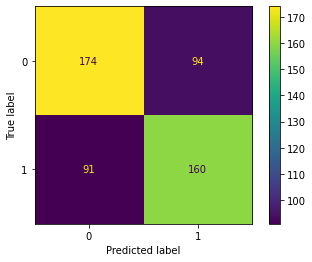

In [382]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# generate the conf matrix
conf_mat = confusion_matrix(y_test, log_reg.predict(X_test))

# plot
ConfusionMatrixDisplay(conf_mat).plot()
plt.show()

In [383]:
# Put the coefficients into a DataFrame
coefs = pd.DataFrame(data=log_reg.coef_, columns=X_train.columns).T
coefs = coefs.rename(columns={0: 'coefs'})

# Display the 20 most positive coefs
coefs.sort_values(by='coefs', ascending=False).tail(20)

,coefs
"Defender: Irving, Kyrie",-0.026936
"Defender: Brewer, Corey",-0.027875
Turnaround Jump Shot,-0.027907
16-24 ft.,-0.028596
"Defender: Farmar, Jordan",-0.030568
"Defender: Green, Danny",-0.031817
Driving Jump shot,-0.033034
Opponent: Minnesota Timberwolves,-0.035116
Opponent: Chicago Bulls,-0.035444
Opponent: Sacramento Kings,-0.038218


In [384]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


estimators = [('scale', MinMaxScaler()),
             ('PCA', PCA()),
             ('model', LogisticRegression())]

pipe = Pipeline(estimators)

In [385]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'model': [LogisticRegression(solver='lbfgs')],
               'scale': [MinMaxScaler(), None],
               'PCA': [PCA(n_components=0.8), None],
               'model__penalty': ['l2', None],
               'model__C': list(np.logspace(-5,5,11))}]

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

In [386]:
fitted_grid = grid.fit(X_train, y_train)

Fitting 5 folds for each of 88 candidates, totalling 440 fits


/Users/jordanfresque/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/jordanfresque/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.5156677  0.51157969        nan        nan 0.5156677  0.51157969
        nan        nan 0.59978792 0.51157969        nan        nan
 0.61953725 0.51157969        nan        nan 0.63554914 0.51157969
        nan        nan 0.63282632 0.51157969        nan        nan
 0.63214431 0.51157969        nan        nan 0.63248502 0.51157969
        nan        nan 0.63248502 0.51157969        nan        nan
 0.63248502 0.51157969        nan        nan 0.63248502 0.51157969
        nan        nan 0.5156677  0.56471103        nan        nan
 0.5156677  0.57390687        

In [387]:
fitted_grid.best_params_

{'PCA': None,
 'model': LogisticRegression(C=0.1),
 'model__C': 0.1,
 'model__penalty': 'l2',
 'scale': MinMaxScaler()}

In [388]:
# Apply min/max scaler
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

# Fit logistic regression on min/max scaled training data
log_reg = LogisticRegression(solver='lbfgs', penalty='l2', C=0.1)
log_reg = log_reg.fit(X_train_mm, y_train)

# Score on train and test sets
print(f'Training accuracy: {log_reg.score(X_train_mm, y_train)}')
print(f'Test accuracy: {log_reg.score(X_test_mm, y_test)}')

Training accuracy: 0.6794959128065395
Test accuracy: 0.6608863198458574


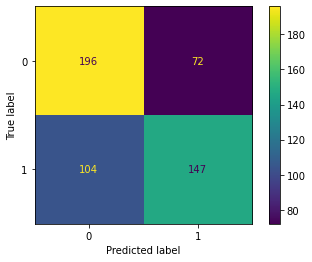

In [390]:
# generate the conf matrix
conf_mat = confusion_matrix(y_test, log_reg.predict(X_test_mm))

# plot
ConfusionMatrixDisplay(conf_mat).plot()
plt.show()

In [391]:
# Put the coefficients into a DataFrame
coefs = pd.DataFrame(data=log_reg.coef_, columns=X_train.columns).T
coefs = coefs.rename(columns={0: 'coefs'})

# Display the 20 most positive coefs
coefs.sort_values(by='coefs', ascending=False).head(20)

,coefs
defender_distance,0.708122
Running Bank shot,0.577083
Driving Finger Roll Layup Shot,0.530323
Driving Reverse Layup Shot,0.524093
shot_clock,0.370856
"Defender: Chalmers, Mario",0.370411
"Defender: Williams, Mo",0.317008
Restricted Area,0.291779
24+ ft.,0.270426
Left Corner 3,0.256907


In [400]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 4)
dt = dt.fit(X_train, y_train)

# Print accuracy scores
print(f'Training accuracy: {dt.score(X_train, y_train)}')
print(f'Test accuracy: {dt.score(X_test, y_test)}')

Training accuracy: 0.6614441416893733
Test accuracy: 0.6685934489402697


In [401]:
import xgboost

In [402]:
from xgboost import XGBClassifier

In [403]:
# fit model on training data
xgb = XGBClassifier()
xgb = xgb.fit(X_train, y_train)

# Print accuracy scores
print(f'Training accuracy: {xgb.score(X_train, y_train)}')
print(f'Test accuracy: {xgb.score(X_test, y_test)}')

/Users/jordanfresque/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:56:15] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy: 0.9638964577656676
Test accuracy: 0.628131021194605


In [404]:
# fit model on training data
xgb = XGBClassifier(n_estimators=1300, max_depth=3, learning_rate=0.00101, gamma=2, subsample=0.69, colsample_bytree=0.59, reg_alpha=0.0006)
xgb = xgb.fit(X_train, y_train)

# Print accuracy scores
print(f'Training accuracy: {xgb.score(X_train, y_train)}')
print(f'Test accuracy: {xgb.score(X_test, y_test)}')

[19:56:17] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jordanfresque/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training accuracy: 0.6614441416893733
Test accuracy: 0.6724470134874759


In [405]:
# fit model on training data
xgb = XGBClassifier(n_estimators=1300, max_depth=3, learning_rate=0.0011, gamma=2.2, subsample=0.69, colsample_bytree=0.6, reg_lambda=0.6)
xgb = xgb.fit(X_train, y_train)

# Print accuracy scores
print(f'Training accuracy: {xgb.score(X_train, y_train)}')
print(f'Test accuracy: {xgb.score(X_test, y_test)}')

[19:56:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jordanfresque/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training accuracy: 0.6611035422343324
Test accuracy: 0.6705202312138728
